In [10]:
import pandas as pd
from influxdb_client import InfluxDBClient
import seaborn as sns
import matplotlib.pyplot as plt

# A few helper functions:
from utils import *

# To illustrate examples
import numpy as np
from scipy.stats import mannwhitneyu, normaltest

url = 'http://192.168.254.89:8086'
token = 'root:root'
org = ''
bucket = 'esp2nred'

with InfluxDBClient(url=url, token=token, org=org) as client:
    query_api = client.query_api()
    #tables = query_api.query('from(bucket: "esp2nred") |> range(start: -7d) |> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")')
    #tables = client.query_api().query(query, org=org)
    #for table in tables:
    #    for record in table.records:
    #        print(record)
    # pivot is in the influxdb query
    df = pd.DataFrame(client.query_api().query_data_frame('from(bucket: "esp2nred") |> range(start: -3d) |> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")'))
df.head()

,result,table,_time,_start,_stop,_measurement,device,location,humidityi,tempf
0,_result,0,2023-09-07 16:01:26.508000+00:00,2023-09-07 15:59:24.168605+00:00,2023-09-10 15:59:24.168605+00:00,data,temp,1,68.0,69.6
1,_result,0,2023-09-07 16:06:26.629000+00:00,2023-09-07 15:59:24.168605+00:00,2023-09-10 15:59:24.168605+00:00,data,temp,1,68.0,69.6
2,_result,0,2023-09-07 16:11:26.670000+00:00,2023-09-07 15:59:24.168605+00:00,2023-09-10 15:59:24.168605+00:00,data,temp,1,67.0,69.6
3,_result,0,2023-09-07 16:16:26.509000+00:00,2023-09-07 15:59:24.168605+00:00,2023-09-10 15:59:24.168605+00:00,data,temp,1,64.0,69.6
4,_result,0,2023-09-07 16:21:26.620000+00:00,2023-09-07 15:59:24.168605+00:00,2023-09-10 15:59:24.168605+00:00,data,temp,1,65.0,69.6


<Axes: xlabel='location', ylabel='tempf'>

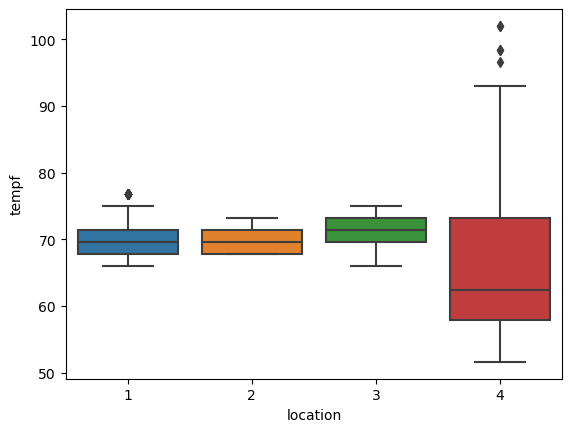

In [3]:
sns.boxplot(data=df, x='location', y='tempf')

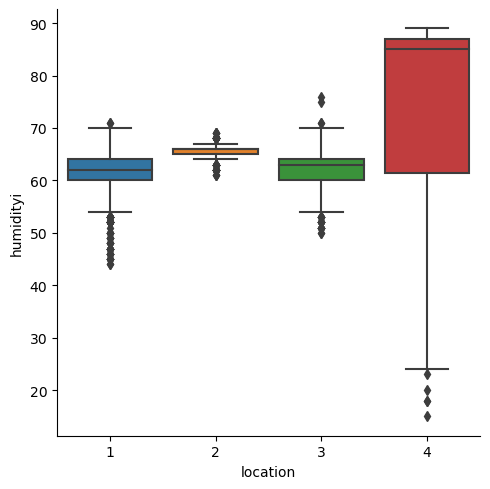

In [4]:
i = sns.catplot(x="location", y="humidityi", data=df, ci='sd', kind="box")

In [ ]:
list(df.location.unique())

In [5]:
loc = df.loc[(df.location=='4'), :]
print_n_projects(loc, '4')
#print_projects_by(loc, 'device', 'count')

There are 707 projects in 4.


In [6]:
df.describe() 

,table,humidityi,tempf
count,2841.000000,2841.000000,2841.000000
mean,1.477649,65.381204,69.280042
std,1.164442,10.746211,5.669732
min,0.000000,15.000000,51.600000
25%,0.000000,61.000000,67.800000
50%,2.000000,64.000000,69.600000
75%,2.000000,67.000000,71.400000
max,3.000000,89.000000,102.000000


In [7]:
df.groupby('location')['tempf'].describe()

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
1,864.0,70.431248,2.584183,66.0,67.8,69.6,71.39999,76.8
2,463.0,69.728294,1.616594,67.8,67.8,69.6,71.40000,73.2
3,807.0,70.936059,2.017338,66.0,69.6,71.4,73.20000,75.0
4,707.0,65.689392,9.848515,51.6,57.9,62.4,73.20000,102.0


In [8]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df)

,result,table,_time,_start,_stop,_measurement,device,location,humidityi,tempf
0,_result,0,2023-09-07 16:01:26.508000+00:00,2023-09-07 15:58:02.202896+00:00,2023-09-10 15:58:02.202896+00:00,data,temp,1,68.0,69.60000
1,_result,0,2023-09-07 16:06:26.629000+00:00,2023-09-07 15:58:02.202896+00:00,2023-09-10 15:58:02.202896+00:00,data,temp,1,68.0,69.60000
2,_result,0,2023-09-07 16:11:26.670000+00:00,2023-09-07 15:58:02.202896+00:00,2023-09-10 15:58:02.202896+00:00,data,temp,1,67.0,69.60000
3,_result,0,2023-09-07 16:16:26.509000+00:00,2023-09-07 15:58:02.202896+00:00,2023-09-10 15:58:02.202896+00:00,data,temp,1,64.0,69.60000
4,_result,0,2023-09-07 16:21:26.620000+00:00,2023-09-07 15:58:02.202896+00:00,2023-09-10 15:58:02.202896+00:00,data,temp,1,65.0,69.60000
5,_result,0,2023-09-07 16:26:26.660000+00:00,2023-09-07 15:58:02.202896+00:00,2023-09-10 15:58:02.202896+00:00,data,temp,1,65.0,69.60000
6,_result,0,2023-09-07 16:31:26.489000+00:00,2023-09-07 15:58:02.202896+00:00,2023-09-10 15:58:02.202896+00:00,data,temp,1,64.0,71.39999
7,_result,0,2023-09-07 16:36:26.626000+00:00,2023-09-07 15:58:02.202896+00:00,2023-09-10 15:58:02.202896+00:00,data,temp,1,64.0,71.39999
8,_result,0,2023-09-07 16:41:26.455000+00:00,2023-09-07 15:58:02.202896+00:00,2023-09-10 15:58:02.202896+00:00,data,temp,1,62.0,71.39999
9,_result,0,2023-09-07 16:46:26.599000+00:00,2023-09-07 15:58:02.202896+00:00,2023-09-10 15:58:02.202896+00:00,data,temp,1,60.0,71.39999


In [ ]:
dfHist = df[['humidityi', 'tempf']]
#dfHist.head()
#dftest = pd.pivot_table(dfHist, values = 'humidityi', index=['_time'], columns = 'location').reset_index()
#display(dftest)

In [ ]:
fig, axes = plt.subplots(2,5, figsize=(15, 5))
ax = axes.flatten()

for i, col in enumerate(dfHist.columns):
    sns.histplot(dfHist[col], ax=ax[i]) # histogram call
    ax[i].set_title(col)
    # remove scientific notation for both axes
    ax[i].ticklabel_format(style='plain', axis='both')

fig.tight_layout(w_pad=6, h_pad=4) # change padding 
plt.show()
